In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import os
import glob
import re
import math as math

In [ ]:

files=glob.glob("./data/*.txt")
Dic=glob.glob("./Diciembre/*.txt")


In [ ]:
date=[]
date_=[]
files_=[]
pattern= int

for i,file in enumerate(files):
    date.append(re.findall(r'\d+',file)[0])


temp=sorted(range(len(date)), key=date.__getitem__)

for i in temp:
    date_.append(date[i])
    print(date[i],files[i])
    files_.append(files[i])

20190930 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20190930.txt
20191031 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20191031.txt
20191130 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20191130.txt
20191231 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20191231.txt
20200131 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20200131_Nal_Ext.txt
20200229 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20200229_Nal_Ext.txt
20200331 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20200331_Nal_Ext.txt
20200430 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20200430_Nal_Ext.txt
20200531 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20200531_Nal_Ext.txt
20200630 ./data/DatosAbiertos-DERFE-pdln_edms_sexo_20200630_Nal_Ext.txt
20200731 ./data/DatosAbiertos-derfe-pdln_edms_sexo_20200731_Nal_Ext.txt
20200831 ./data/DatosAbiertos-derfe-pdln_edms_sexo_20200831_Nal_Ext.txt
20200930 ./data/DatosAbiertos-derfe-pdln_edms_sexo_20200930_Nal_Ext.txt
20201031 ./data/DatosAbiertos-derfe-pdln_edms_sexo_20201031_Nal_Ext.txt
20201130 ./data/DatosAbi

In [ ]:
for i,file in enumerate(files_):
  data=pd.read_csv(file)
  data=data[1:]
  data=data[data['ENTIDAD']==11][1:]
  mpo=data.groupby(['MUNICIPIO']).sum()
  if i==0 :
    if 'LISTA_NAL' in mpo.columns:
      df_mpo = pd.DataFrame(mpo['LISTA_NAL'])
    if 'LISTA_NACIONAL' in mpo.columns:
      df_mpo = pd.DataFrame(mpo['LISTA_NACIONAL'])
    if 'LISTA' in mpo.columns:
      df_mpo = pd.DataFrame(mpo['LISTA'])
  else:
    if 'LISTA_NAL' in mpo.columns:
      df_mpo[date_[i]]=mpo['LISTA_NAL']
    if 'LISTA_NACIONAL' in mpo.columns:
      df_mpo[date_[i]]=mpo['LISTA_NACIONAL']
    if 'LISTA' in mpo.columns:
      df_mpo[date_[i]]=mpo['LISTA']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lista nominal Por mes (Guanajuato)

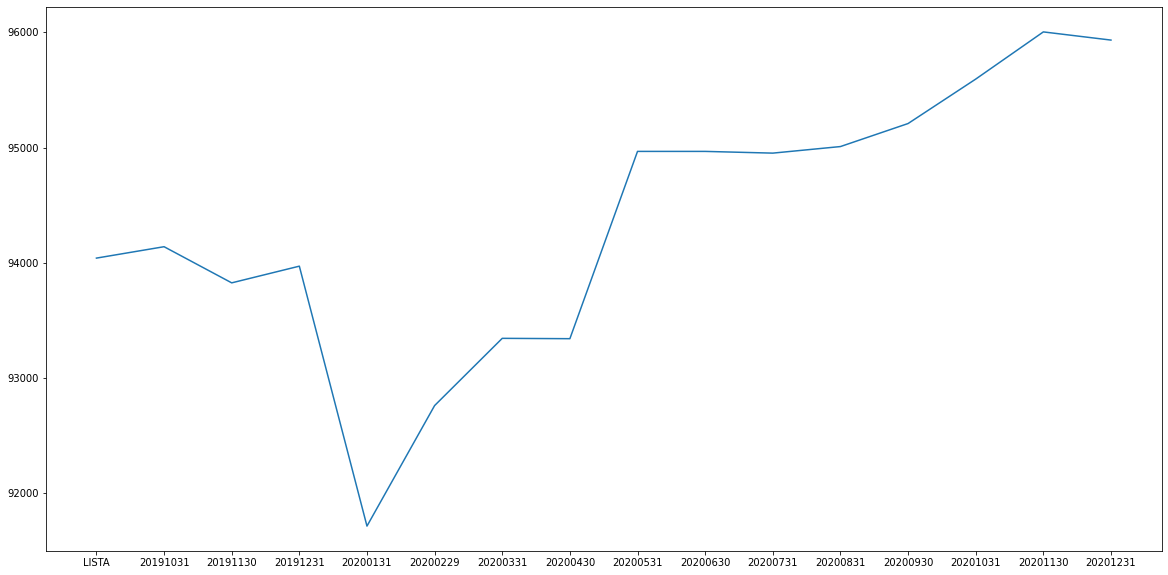

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_mpo.iloc[1])

In [ ]:
print(df_mpo)

             LISTA  20191031  20191130  ...  20201031  20201130  20201231
MUNICIPIO                               ...                              
1            67427     67541     67450  ...     68241     68422     68611
2            94040     94139     93825  ...     95595     96005     95934
3           128446    128937    128731  ...    131903    132669    133489
4            49656     49787     49699  ...     50647     50867     50877
5            67868     68120     67992  ...     69745     70072     70194
6             4207      4228      4203  ...      4245      4262      4261
7           378361    379387    378139  ...    385535    386714    387848
8            31431     31546     31501  ...     32043     32435     32565
9            60267     60366     60337  ...     61486     61679     61915
10            9283      9315      9288  ...      9380      9413      9456
11           74256     74574     74297  ...     75457     75724     75755
12           23212     23288     23300

In [ ]:
municipios=np.asarray(df_mpo)

In [ ]:
fits=[]
prediction_lnal=[]

for i in range (len(municipios)):
  xx=np.arange(len(municipios[i]))
  ma, ba = np.polyfit(xx, municipios[i], 1,w=municipios[i])
  fits.append([ma,ba])
  pred=ma*(xx[-2]+12)+ba
  if pred < municipios[i] [-1]:
    pred=municipios[i] [-1]
  
  prediction_lnal.append(pred)  




In [ ]:
df_mpo['PREDICTION LNAL']=prediction_lnal

In [ ]:
df_mpo

,LISTA,20191031,20191130,20191231,20200131,20200229,20200331,20200430,20200531,20200630,20200731,20200831,20200930,20201031,20201130,20201231,PREDICTION LNAL
MUNICIPIO,,,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,66736.0,68057,68054,68052,68093,68244,68241,68422,68611,6.965374e+04
2,94040,94139,93825,93970,91712,92759,93343,93340.0,94967,94967,94952,95009,95209,95595,96005,95934,9.773153e+04
3,128446,128937,128731,128978,125884,127461,128544,128543.0,130720,130717,130708,130992,131172,131903,132669,133489,1.364124e+05
4,49656,49787,49699,49818,48907,49311,49596,49596.0,50283,50281,50273,50287,50324,50647,50867,50877,5.177422e+04
5,67868,68120,67992,68218,66789,67553,68063,68058.0,69125,69124,69114,69132,69287,69745,70072,70194,7.186328e+04
6,4207,4228,4203,4200,4145,4162,4212,4212.0,4244,4244,4244,4249,4253,4245,4262,4261,4.317019e+03
7,378361,379387,378139,378402,370594,374915,378228,378153.0,383007,383002,382980,383071,383484,385535,386714,387848,3.946692e+05
8,31431,31546,31501,31455,30822,31080,31406,31385.0,31800,31799,31797,31818,31816,32043,32435,32565,3.303906e+04
9,60267,60366,60337,60325,58753,59504,59917,59910.0,60931,60931,60929,60987,61077,61486,61679,61915,6.298260e+04


In [ ]:
LN_JUNIO=df_mpo['PREDICTION LNAL']
print (LN_JUNIO.to_latex())

\begin{tabular}{lr}
\toprule
{} &  PREDICTION LNAL \\
MUNICIPIO &                  \\
\midrule
1         &     6.965374e+04 \\
2         &     9.773153e+04 \\
3         &     1.364124e+05 \\
4         &     5.177422e+04 \\
5         &     7.186328e+04 \\
6         &     4.317019e+03 \\
7         &     3.946692e+05 \\
8         &     3.303906e+04 \\
9         &     6.298260e+04 \\
10        &     9.540517e+03 \\
11        &     7.715305e+04 \\
12        &     2.423195e+04 \\
13        &     1.914123e+04 \\
14        &     1.189535e+05 \\
15        &     1.464959e+05 \\
16        &     1.709458e+04 \\
17        &     4.443316e+05 \\
18        &     3.024476e+04 \\
19        &     4.237891e+04 \\
20        &     1.198745e+06 \\
21        &     4.515059e+04 \\
22        &     1.886760e+04 \\
23        &     1.303867e+05 \\
24        &     1.106851e+04 \\
25        &     5.858257e+04 \\
26        &     4.773300e+04 \\
27        &     2.213260e+05 \\
28        &     8.527241e+04 \\
29       

In [ ]:
df_cociente=df_mpo['PREDICTION LNAL']/(df_mpo['20201231'])

df_cociente2=pd.DataFrame({'LISTA_NAL':df_cociente}).sum()
df_cociente3=df_cociente2/46
df_cociente4=pd.DataFrame({'':df_cociente})

In [ ]:
df_cociente4

,
MUNICIPIO,
1,1.015198
2,1.018737
3,1.021900
4,1.017635
5,1.023781
6,1.013147
7,1.017587
8,1.014557
9,1.017243


In [ ]:
print (df_cociente4.to_latex())

\begin{tabular}{lr}
\toprule
{} \\
MUNICIPIO &           \\
\midrule
1         &  1.015198 \\
2         &  1.018737 \\
3         &  1.021900 \\
4         &  1.017635 \\
5         &  1.023781 \\
6         &  1.013147 \\
7         &  1.017587 \\
8         &  1.014557 \\
9         &  1.017243 \\
10        &  1.008938 \\
11        &  1.018455 \\
12        &  1.018534 \\
13        &  1.016582 \\
14        &  1.018769 \\
15        &  1.018606 \\
16        &  1.008768 \\
17        &  1.018981 \\
18        &  1.018822 \\
19        &  1.013753 \\
20        &  1.022978 \\
21        &  1.020768 \\
22        &  1.017780 \\
23        &  1.016090 \\
24        &  1.008888 \\
25        &  1.027764 \\
26        &  1.011871 \\
27        &  1.013402 \\
28        &  1.011979 \\
29        &  1.006863 \\
30        &  1.019524 \\
31        &  1.021340 \\
32        &  1.019717 \\
33        &  1.016597 \\
34        &  1.000000 \\
35        &  1.019401 \\
36        &  1.010400 \\
37        &  1.020101 \\
38    

In [ ]:
data16=pd.read_csv(Dic[0],usecols=[0,2,3,13])
data16_GTO=data16[data16['ENTIDAD']==11]
data16_GTO

,ENTIDAD,MUNICIPIO,SECCION,LISTA_NAL
17933,11,0,0,0
17934,11,6,331,698
17935,11,6,332,771
17936,11,6,333,1076
17937,11,6,334,675
...,...,...,...,...
21090,11,17,1173,1441
21091,11,17,1174,1977
21092,11,17,1175,1243
21093,11,17,1176,4732


In [ ]:
mpos=np.unique(data16_GTO['MUNICIPIO'])
mpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [ ]:
seccs=np.unique(data16_GTO['SECCION'])
seccs

array([   0,    1,    2, ..., 3176, 3177, 3178])

In [ ]:
ln_seccion=[]
for seccion in seccs[1:]:
  ln_seccion.append(data16_GTO[data16_GTO['SECCION']==seccion]['LISTA_NAL'].sum())
df_porsecc=pd.DataFrame({'SECCION':seccs[1:],'LISTA_NAL_SEC_20201231':ln_seccion})
df_porsecc

,SECCION,LISTA_NAL_SEC_20201231
0,1,1571
1,2,2033
2,3,1537
3,4,957
4,5,1068
...,...,...
3156,3174,2718
3157,3175,2694
3158,3176,381
3159,3177,1668


In [ ]:
data_Seccion=[]
for mpo in mpos[1:]:
  data_Seccion.append([data16_GTO[data16_GTO['MUNICIPIO']==mpo]['LISTA_NAL']])
df_data_seccionmpo=pd.DataFrame({'LISTA_NAL':data_Seccion})
df_data_seccionmpo

,LISTA_NAL
0,"[[1571, 2033, 1537, 957, 1068, 2949, 1342, 137..."
1,"[[3456, 766, 777, 777, 616, 1321, 1102, 1617, ..."
2,"[[5588, 1327, 1410, 1175, 6345, 2078, 1099, 77..."
3,"[[1440, 1369, 1481, 1631, 1386, 955, 972, 2503..."
4,"[[3413, 2620, 1832, 1531, 3246, 1265, 4839, 16..."
5,"[[698, 771, 1076, 675, 1041]]"
6,"[[1206, 2101, 838, 1756, 1459, 2067, 2725, 227..."
7,"[[1407, 1129, 731, 941, 1538, 1018, 652, 1279,..."
8,"[[3008, 1359, 1666, 2222, 1349, 1300, 1543, 15..."
9,"[[933, 839, 1649, 980, 651, 669, 732, 507, 164..."


In [ ]:
array_sec=np.array(ln_seccion)
array_cociente=np.array(df_cociente3)
array_pred=array_sec*array_cociente
array_pred

array([1596.50257409, 2066.00237628, 1561.9506406 , ...,  387.1849018 ,
       1695.07720788, 1092.45083841])

Número de casillas necesarias en Diciembre de 2020

In [ ]:
array_casillas_dic=array_sec/750
for i in range(0,3161):
  array_casillas_dic[i]=math.ceil(array_casillas_dic[i])
num_casillas_dic=array_casillas_dic.sum()
num_casillas_dic

7609.0

Número de casillas para Junio 2021

In [ ]:
array_casillas=array_pred/750
for i in range(0,3161):
  array_casillas[i]=math.ceil(array_casillas[i])
num_casillas=array_casillas.sum()
num_casillas

7702.0